# Lending Club Case Study

## Objectives

### This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. <br><br>Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. <br><br>If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. <br><br>In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. <br><br>To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

## Start of the Data Cleanup process

In [1]:
# importing library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading dataframe
loan_df= pd.read_csv("loan.csv")

/Users/manishkumar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Learning about dataframe 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#Check the shape of dataframe
loan_df.shape

(39717, 111)

In [5]:
# Read top 10 rows of dataframe 
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Check each columns and their null values counts
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Check each columns and their null values counts in percentage wise.
(loan_df.isnull().sum()/len(loan_df.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [8]:
# Using following command we can drop columns which are having all null values.
loan_df=loan_df.dropna(axis=1, how='all')

In [9]:
#Check the shape again
print("Dataframe Shape = ",loan_df.shape)

#check each columns and their null values counts in percentage wise aagin.
print((loan_df.isnull().sum()/len(loan_df.index))*100)

Dataframe Shape =  (39717, 57)
id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti      

In [10]:
#check the colums with most number of null values in sorted order but top 20 to make the record looks easily readable.
((loan_df.isnull().sum()/len(loan_df.index))*100).sort_values(ascending=False).head(20)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
collection_recovery_fee        0.000000
acc_now_delinq                 0.000000
application_type               0.000000
url                            0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
dtype: float64

In [11]:
# With above result we larn that there are some columns which are having more than 50% of null values. It is better to drop such columns.
# After reading the dataframe in excel I am able to understand that 'desc' column which has around 32% null is already having 
# Similar column called 'purpose', hence droping 'desc' as well.
loan_df=loan_df.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'])

In [12]:
#Check the shape again
print("Dataframe Shape after dropping columns = ",loan_df.shape)
#Check each columns and their null values counts in percentage wise aagin.
print(((loan_df.isnull().sum()/len(loan_df.index))*100).sort_values(ascending=False))

Dataframe Shape after dropping columns =  (39717, 53)
emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
annual_inc                    0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
loan_status                   0.000000
issue_d                       0.000000
verification_status           0.000000
sub_grade                     0.000000
home_ownership                0.000000
addr_state                    0.000000
grade                         0.000000
installment                   0.000000
int_rate                      0.000000
term                          0.000000
funded_amn

In [13]:
# Result above shows that we are still left with some amount of null values. 
# Lest drop null values from the dataframe now.
print("Dataframe Shape before drop nulls = ",loan_df.shape)
loan_df=loan_df.dropna()
print("Dataframe Shape after drop nulls = ",loan_df.shape)

Dataframe Shape before drop nulls =  (39717, 53)
Dataframe Shape after drop nulls =  (36431, 53)


In [14]:
#Check the shape again
print("Dataframe Shape = ",loan_df.shape)
#Check each columns and their null values counts in percentage wise again.
print((loan_df.isnull().sum()/len(loan_df.index))*100)

Dataframe Shape =  (36431, 53)
id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec          

In [15]:
# lets download this data and read it througly and decide to remove some of the unwanted columns.
# loan_df.to_csv('loan_filtered_csv.csv', index=False)

In [16]:
# After checking the loan_filtered dataframe, it is clear that some of the columns are not necessary
#for my study to find defaulter pattern. So Lets drop them again.
# loan_df=loan_df.drop(columns=['pymnt_plan','url','zip_code','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'])

In [17]:
# lets download this data and read it througly and decide to remove some of the unwanted columns.
# loan_df.to_csv('loan_filtered-2_csv.csv', index=False)

In [18]:
#check the dataframe size after above column drop operation.
loan_df.shape

(36431, 53)

In [19]:
#check the dataframe existing columns and values
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
#analysing the columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

## Modification of columns

### Modifying 'term', 'int_rate', 'emp_length', 'revol_util' column

In [21]:
loan_df['term'] = loan_df['term'].str.rstrip('months')
loan_df['term'] = loan_df['term'].astype(np.int)
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [22]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')
loan_df['int_rate'] = loan_df['int_rate'].astype(np.float)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [23]:
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip('years ')
loan_df['emp_length'].replace({'10+': '10'}, inplace=True)
loan_df['emp_length'][loan_df['emp_length'] == '< 1'] = '0.5'
loan_df['emp_length'] = loan_df['emp_length'].astype(np.float)
print(loan_df['emp_length'].dtype)
loan_df.iloc[:,10:20].head()

float64


<ipython-input-23-69c9dcd37237>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['emp_length'][loan_df['emp_length'] == '< 1'] = '0.5'


,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose
1,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car
3,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other
4,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other
5,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding
6,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation


In [24]:
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')
loan_df['revol_util'] = loan_df['revol_util'].astype(np.float)
print(loan_df['revol_util'].dtype)
loan_df.iloc[:,20:30].head()

float64


,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal
1,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687
3,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598
4,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783
5,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963
6,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726


In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  int64  
 6   int_rate                    36431 non-null  float64
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  float64
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

# Start the data visualization

## Count of unique values column-wise

In [26]:
datafr = []
for row in loan_df.columns.tolist():
    datafr.append({'column_name':row, 'count' : len(loan_df[row].unique())})
datafr = pd.DataFrame(datafr).sort_values('count')
print(datafr)
len(datafr.index)

                   column_name  count
52                   tax_liens      1
50                 delinq_amnt      1
49    chargeoff_within_12_mths      1
48              acc_now_delinq      1
47            application_type      1
46                 policy_code      1
45  collections_12_mths_ex_med      1
32         initial_list_status      1
17                  pymnt_plan      1
5                         term      2
51        pub_rec_bankruptcies      3
14         verification_status      3
16                 loan_status      3
12              home_ownership      4
28                     pub_rec      5
8                        grade      7
26              inq_last_6mths      9
24                 delinq_2yrs     11
11                  emp_length     11
19                     purpose     14
9                    sub_grade     35
27                    open_acc     38
22                  addr_state     48
15                     issue_d     51
31                   total_acc     79
44          

53

In [27]:
#Checking duplicate member_id presence
loan_df.loan_amnt.describe()

count    36431.000000
mean     11307.794186
std       7433.904309
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [28]:
# Find the average loan amount given by our bank to the public
print("Total sum of loan given by bank to all its customer is: ",loan_df['funded_amnt'].sum())
print("Average loan amount senctioned by bank to customer is:  ",loan_df['funded_amnt'].mean())

Total sum of loan given by bank to all its customer is:  401940800
Average loan amount senctioned by bank to customer is:   11032.933490708463


In [29]:
# find out the loan amount v/s loan status from our dataframe.


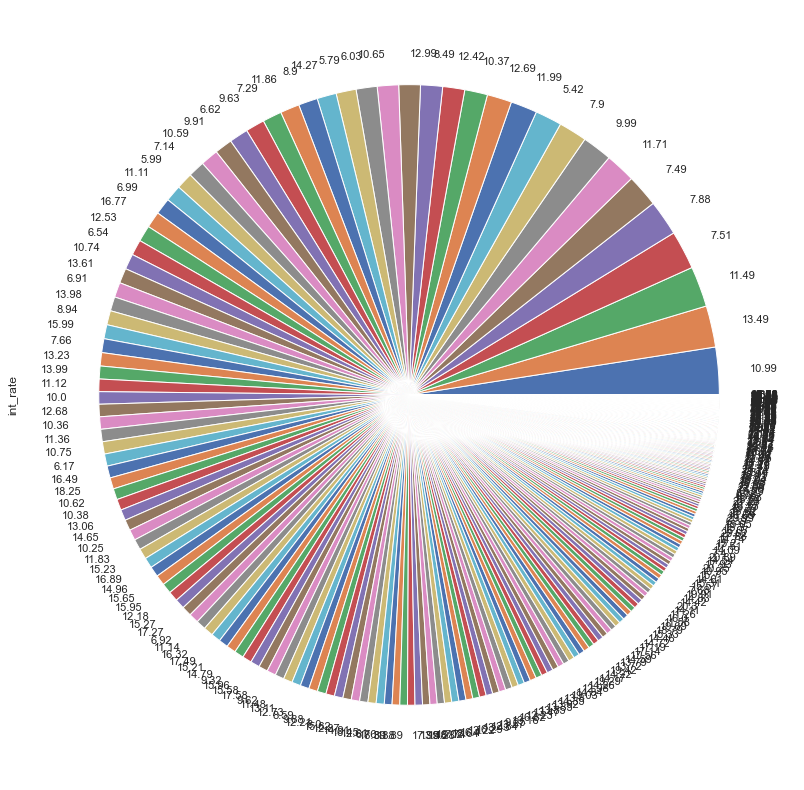

In [64]:
# check piechart
fig_pie = plt.figure()
loan_df['int_rate'].value_counts().plot.pie()
fig_pie.savefig('./plots/pie.png')

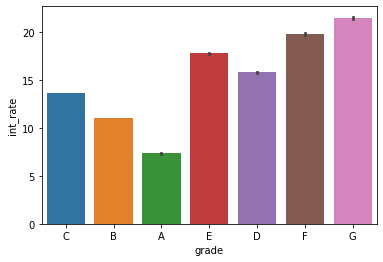

In [31]:
sns.barplot(x = loan_df.grade, y = loan_df.int_rate)
plt.show()

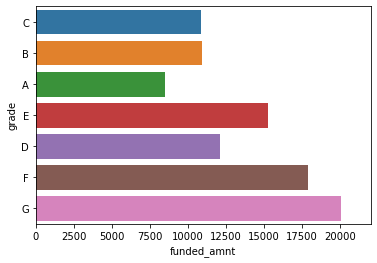

In [32]:
fig2 = plt.figure()
sns.barplot(data=loan_df,x="funded_amnt",y="grade",errwidth=0)
fig2.savefig('./plots/funded_amountVSgrade.png')

<Figure size 432x288 with 0 Axes>

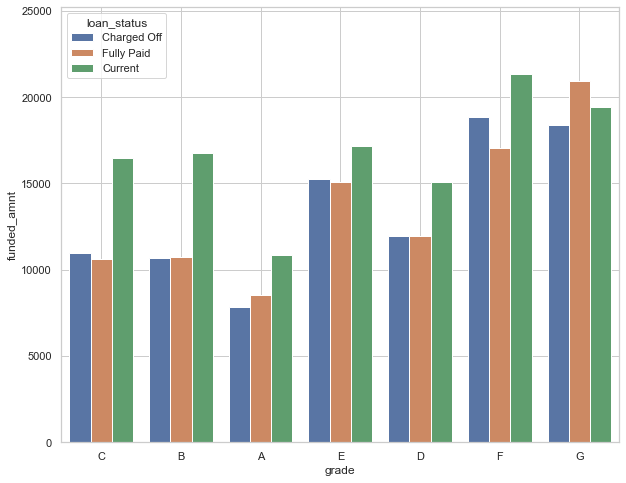

In [33]:
fig3 = plt.figure()
plt.figure(figsize=[10,8])
sns.set_theme(style="whitegrid")
sns.barplot(data= loan_df, y="funded_amnt", x="grade",  hue='loan_status', errwidth=0.0).grid(axis='x')
fig3.savefig('./plots/S_funded_amountVSgradeWRTstatus.png')

<Figure size 432x288 with 0 Axes>

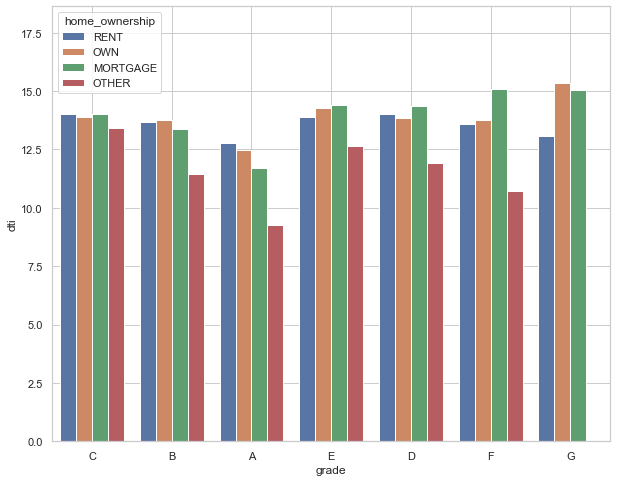

In [34]:
fig4 = plt.figure()
plt.figure(figsize=[10,8])
sns.set_theme(style="whitegrid")
sns.barplot(data= loan_df, y="dti", x="grade",  hue='home_ownership', errwidth=0.0).grid(axis='x')
fig4.savefig('./plots/S_dtiVSgradeWRThomeownership.png')

# Start of Exploratory Data Analysis

## UNIVARIATE ANALYSIS

### analysis of 'loan_status' column

In [36]:
loan_df.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

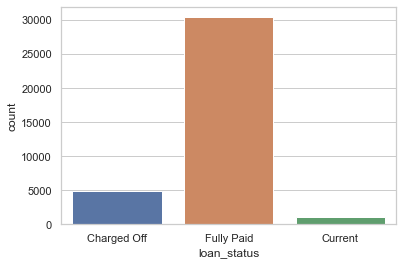

In [37]:
fig5 = plt.figure()
sns.countplot(x = loan_df.loan_status)
plt.show()
fig5.savefig('./plots/M_UA_loanStatus.png')

In [38]:
perc = len(loan_df[loan_df['loan_status'] == 'Fully Paid'].index)\
       /len(loan_df.index)*100
perc2 = len(loan_df[loan_df['loan_status'] == 'Charged Off'].index)\
       /len(loan_df.index)*100
print(f'Inference: The percentage of Fully Paid people is: {round(perc,2)}%')
print(f'           The percentage of Defaulted people is: {round(perc2,2)}%')

Inference: The percentage of Fully Paid people is: 83.51%
           The percentage of Defaulted people is: 13.57%


### analysis of 'loan_amnt' column

In [39]:
loan_df.loan_amnt.describe()

count    36431.000000
mean     11307.794186
std       7433.904309
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

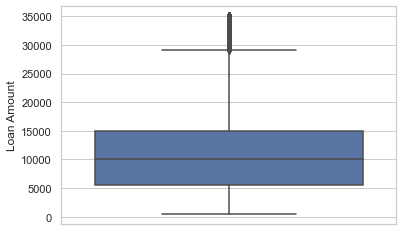

In [40]:
fig6 = plt.figure()
sns.boxplot(y = loan_df['loan_amnt'])
plt.ylabel('Loan Amount')
plt.show()
fig6.savefig('./plots/M_UA_loanAmount.png')

#### Finding: The loan amount varies from 500 to 35,000 USD with a mean of 11,308 USD

### analysis of 'emp_length' column

In [41]:
loan_df.emp_length.describe()

count    36431.000000
mean         5.071423
std          3.466879
min          0.500000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

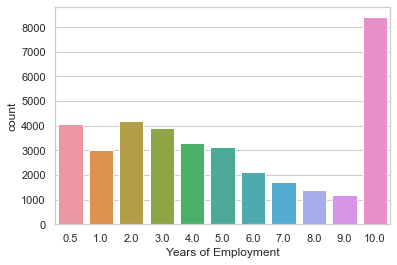

In [42]:
fig7 = plt.figure()
sns.countplot(x = loan_df['emp_length'])
plt.xlabel('Years of Employment')
plt.show()
fig7.savefig('./plots/M_UA_empLength.png')

In [43]:
exp_wise_count_perc = []

for row in loan_df.emp_length.unique().tolist():
    exp_wise_count_perc.append({'Experience(in years)': row, 'percentage(%)': \
                                round((len(loan_df[loan_df['emp_length'] == row].index)/len(loan_df.index))*100,2)})
exp_wise_count_perc = pd.DataFrame(exp_wise_count_perc).sort_values('Experience(in years)')
exp_wise_count_perc

,Experience(in years),percentage(%)
0,0.5,11.12
2,1.0,8.31
9,2.0,11.46
3,3.0,10.74
7,4.0,9.05
6,5.0,8.59
8,6.0,5.82
10,7.0,4.66
4,8.0,3.86
5,9.0,3.31


#### Inference: <br> Maximum number of borrowers have 10+ years of experience : 23.08% <br>          Minimum number of borrowers have 9 years of experience : 3.31%

### analysis of 'funded_amnt' column

In [44]:
loan_df.funded_amnt.describe()

count    36431.000000
mean     11032.933491
std       7166.520054
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

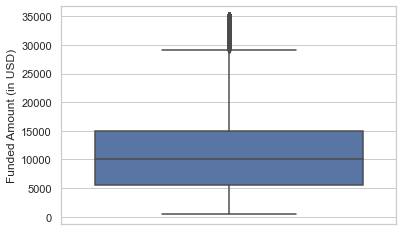

In [45]:
fig8 = plt.figure()
sns.boxplot(y= loan_df.funded_amnt)
plt.ylabel('Funded Amount (in USD)')
plt.show()
fig8.savefig('./plots/M_UA_fundedAmount.png')

#### Inference:<br> Funded Amount varies from 500 to 35000 USD, with an average value of 11033 USD. <br> The distribution is similar to Loan Amount column

### analysis of 'term' column

In [46]:
loan_df.term.value_counts()

36    26375
60    10056
Name: term, dtype: int64

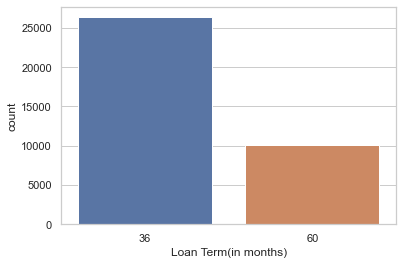

In [47]:
fig9 = plt.figure()
sns.countplot(x = loan_df['term'])
plt.xlabel('Loan Term(in months)')
plt.show()
fig9.savefig('./plots/M_UA_term.png')

In [48]:
term36 = len(loan_df[loan_df['term'] == 36].index)\
       /len(loan_df.index)*100
term60 = len(loan_df[loan_df['term'] == 60].index)\
       /len(loan_df.index)*100
print(f'Inference:\nThe percentage of 36-month loan term is: {round(term36,2)}%')
print(f'The percentage of 60-month loan term is: {round(term60,2)}%')

Inference:
The percentage of 36-month loan term is: 72.4%
The percentage of 60-month loan term is: 27.6%


### analysis of 'grade' column

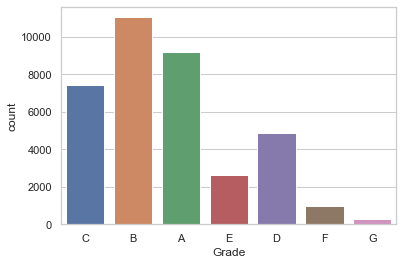

In [49]:
fig10 = plt.figure()
sns.countplot(x= loan_df['grade'])
plt.xlabel('Grade')
plt.show()
fig10.savefig('./plots/M_UA_grade.png')

In [50]:
grade_wise_prcnt = []

for row in loan_df.grade.unique().tolist():
    grade_wise_prcnt.append({'Grade': row, 'percentage(%)': \
                                round((len(loan_df[loan_df['grade'] == row].index)/len(loan_df.index))*100,2)})
grade_wise_prcnt = pd.DataFrame(grade_wise_prcnt).sort_values('Grade')
grade_wise_prcnt['Cummulative Percentage'] = grade_wise_prcnt['percentage(%)'].cumsum()
grade_wise_prcnt

,Grade,percentage(%),Cummulative Percentage
2,A,25.18,25.18
1,B,30.29,55.47
0,C,20.39,75.86
4,D,13.38,89.24
3,E,7.27,96.51
5,F,2.66,99.17
6,G,0.82,99.99


#### Inference: <br>As per the graph and table above, Maximum loans are granted for high graded loans<br>Equivalent to 76% for grades A, B & C

### analysis of columns 'annual_inc', 'dti'

In [51]:
loan_df.annual_inc.describe()

count    3.643100e+04
mean     6.930694e+04
std      6.354376e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

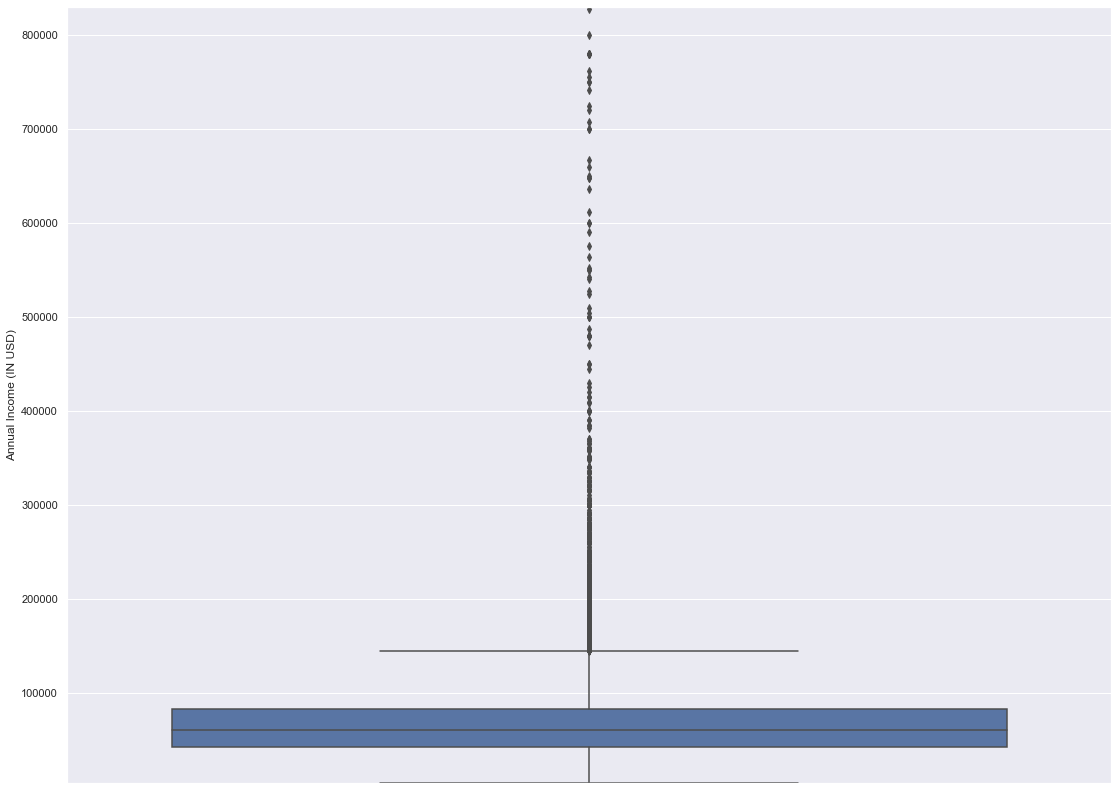

In [52]:
sns.set(rc={'figure.figsize':(18.7,14.27)})
sns.boxplot(y= loan_df['annual_inc'])
plt.ylabel('Annual Income (IN USD)')
plt.ylim(4.000000e+03,8.300000e+05)
plt.show()

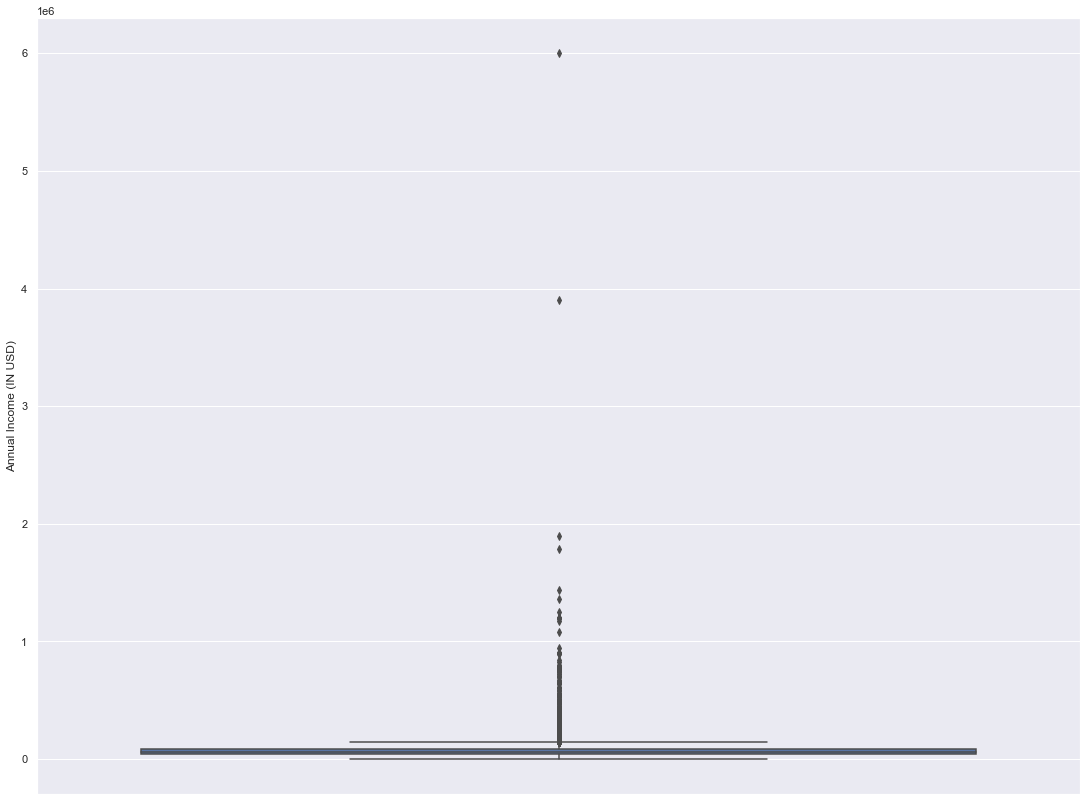

In [53]:
fig11 = plt.figure()
sns.boxplot(y= loan_df['annual_inc'])
plt.ylabel('Annual Income (IN USD)')
plt.show()
fig11.savefig('./plots/M_UA_annualIncome.png')

#### Inference:<br>Only 2 values cross the value of 3 million USD<br>Most candidates have an income of less than 1 million USD

In [54]:
len(loan_df.dti.unique())

2857

[ 0.    5.   10.   15.   19.99 24.99 29.99]


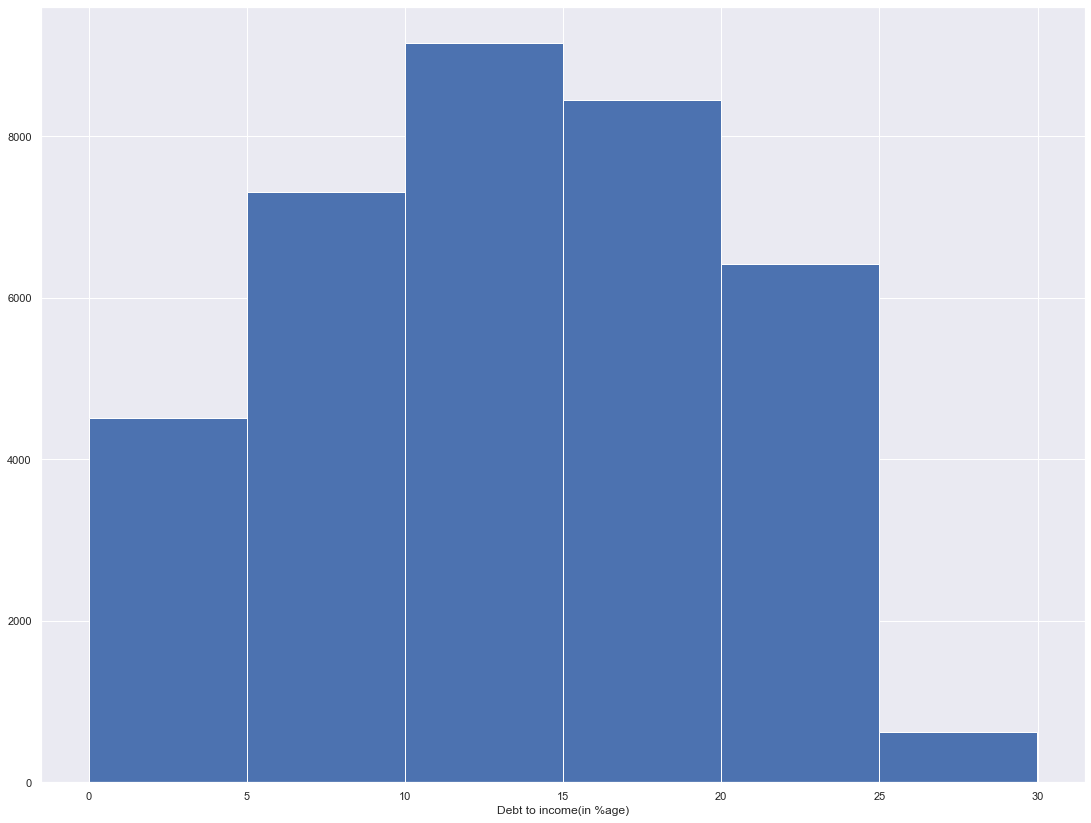

In [55]:
fig12 = plt.figure()
(n, bins, patches) = plt.hist(loan_df.dti, bins= 6)
bins = np.round(bins, decimals= 2)
print(bins)
plt.xlabel('Debt to income(in %age)')
plt.show()
fig12.savefig('./plots/M_UA_dti.png')

# Segmented Univariate Analysis

### analysis of 'emp_length'(work experience) with 'loan_status'

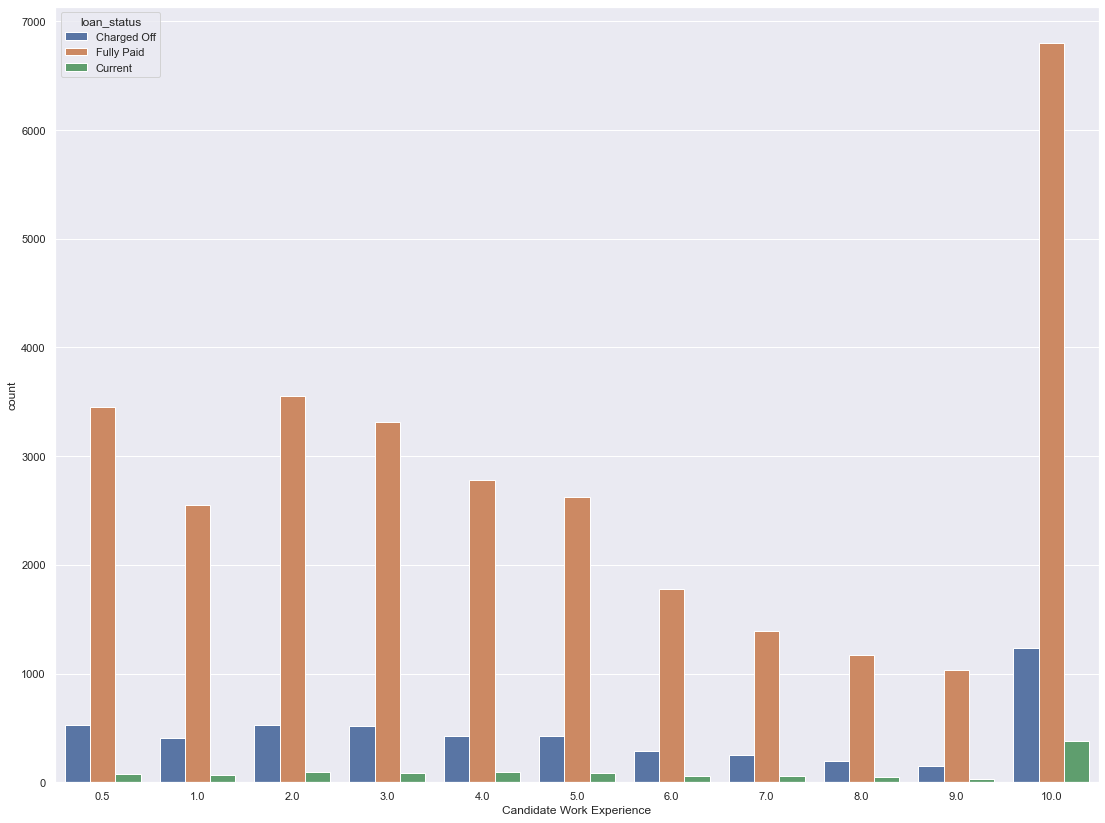

In [56]:
fig13 = plt.figure()
sns.countplot(x='emp_length', hue='loan_status', data=loan_df)
plt.xlabel('Candidate Work Experience')
plt.show()
fig13.savefig('./plots/M_SUA_empLenVSloanStatus.png')

#### Inference: <br>Maximum number of defaulters are the people with 10+ years of experience

### analysis of Interest rate with Grade

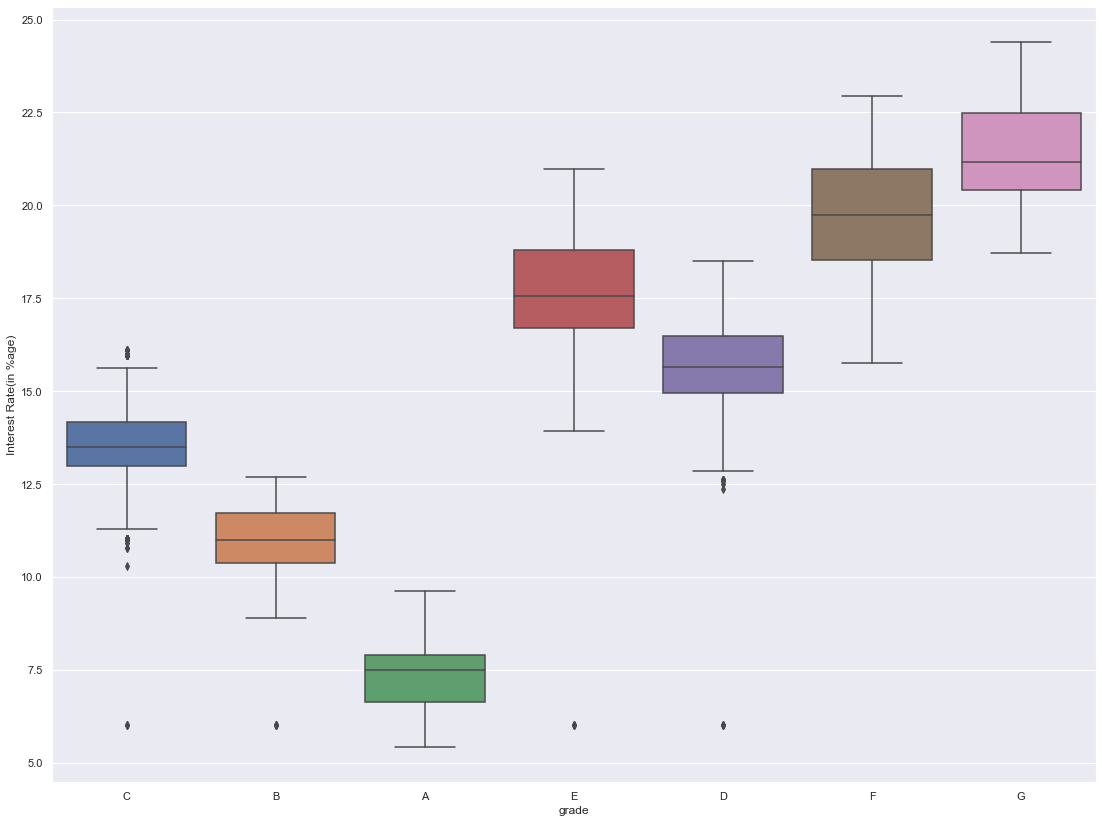

In [57]:
fig14 = plt.figure()
sns.boxplot(y='int_rate', x='grade', data=loan_df)
plt.ylabel('Interest Rate(in %age)')
plt.show()
fig14.savefig('./plots/M_SUA_intRateVSGrade.png')

#### Inference: <br>Interest Rate increases as the Grade is lowered

### analysis of purpose with loan_status, term

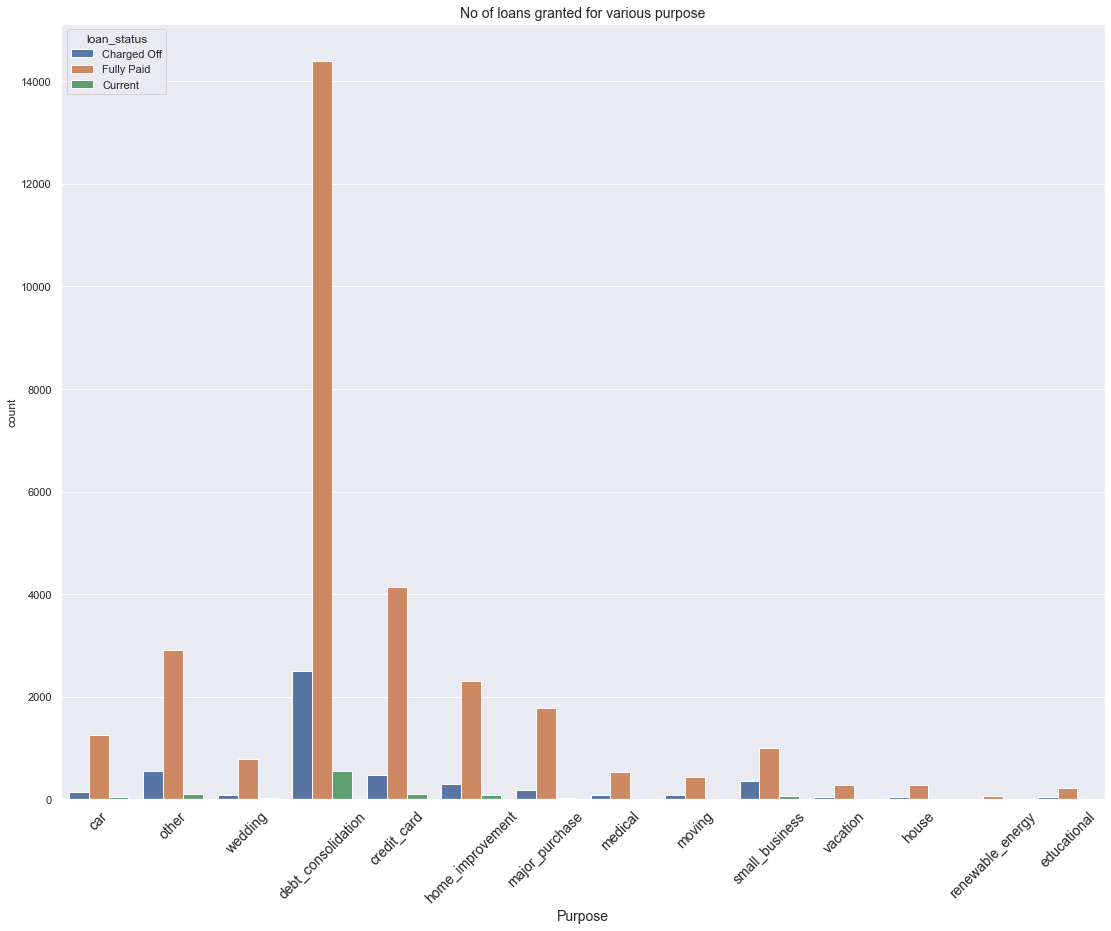

In [58]:
fig15 = plt.figure()
sns.countplot(x='purpose', hue='loan_status', data=loan_df)
plt.title('No of loans granted for various purpose', fontsize = 14)
plt.xlabel('Purpose', fontsize = 14)
plt.xticks(fontsize = 14, rotation=45)
plt.show()
fig15.savefig('./plots/M_SUA_purposeVSloanStatus.png')

#### Inference:<br>Maximum defaulters are the ones taking loan for debt consolidation

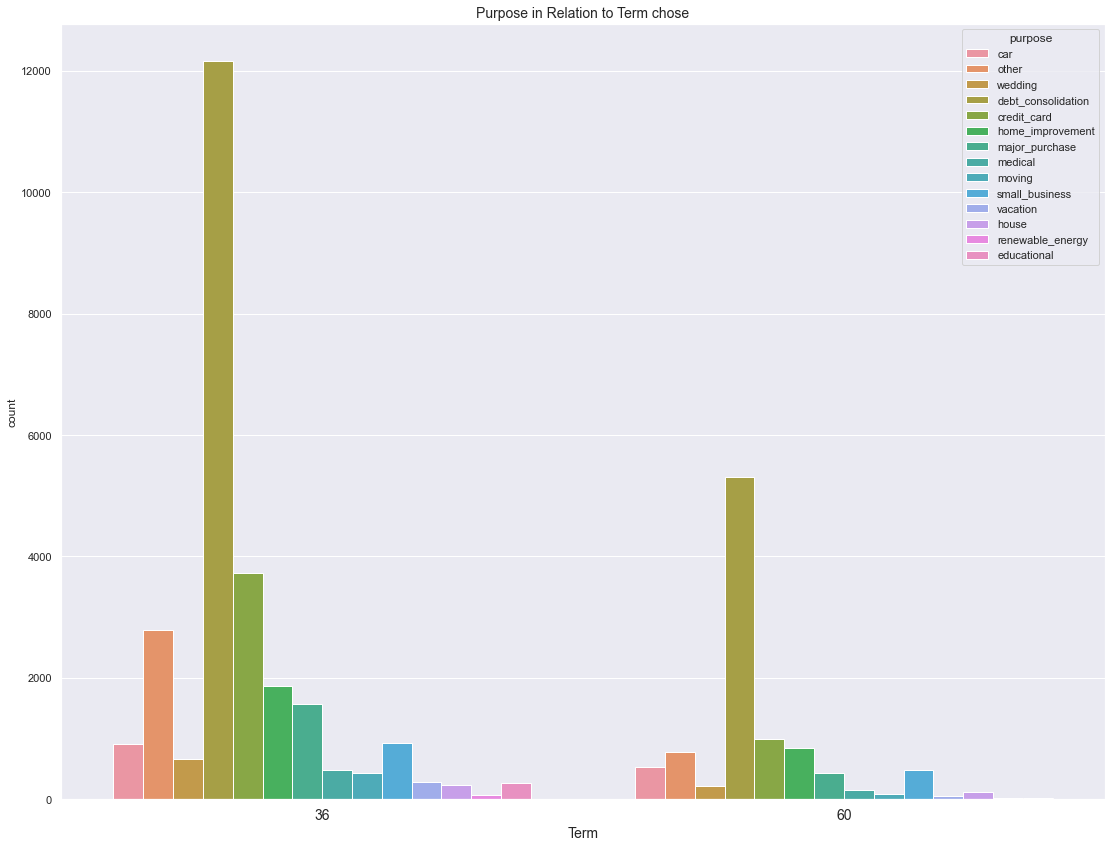

In [59]:
fig16 = plt.figure()
sns.countplot(x='term', hue='purpose', data=loan_df)
plt.title('Purpose in Relation to Term chose', fontsize = 14)
plt.xlabel('Term', fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()
fig16.savefig('./plots/M_SUA_purposeVSterm.png')

#### Inference:<br> Maximum number of candidates go for 36 months tenure for loan repayment

### analysis of term with loan status

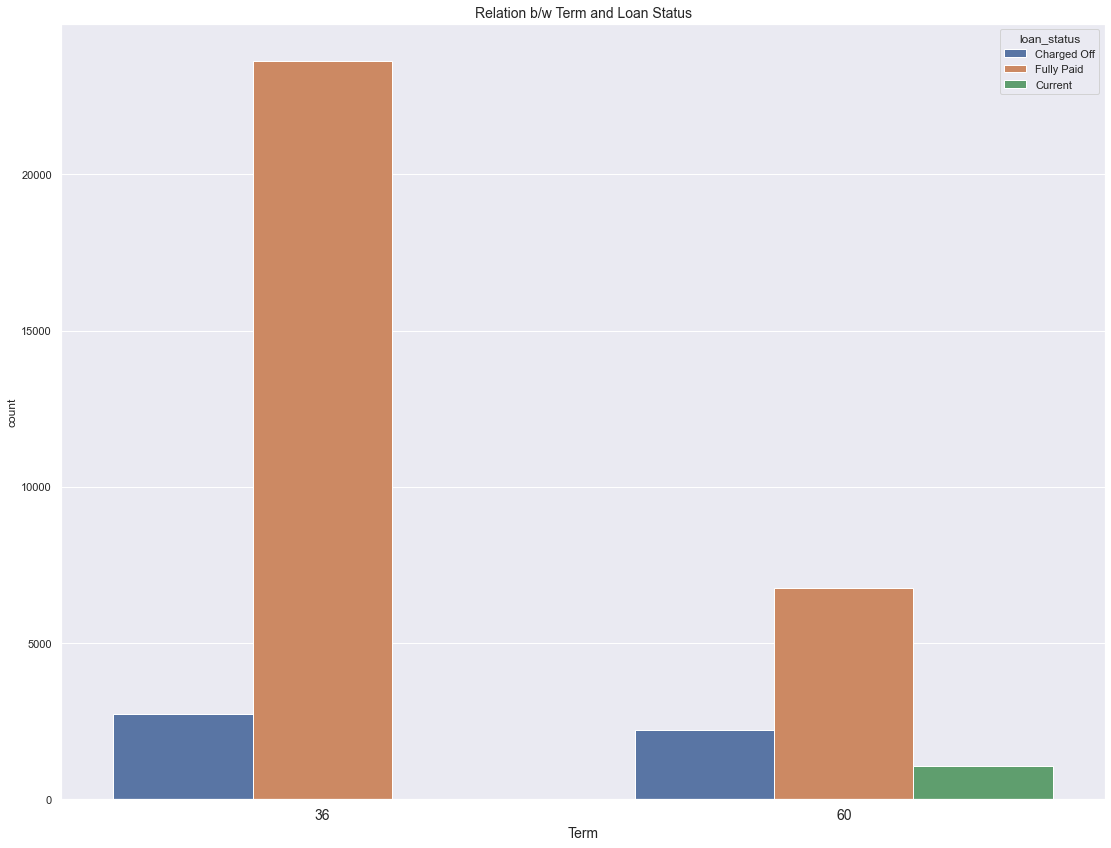

In [60]:
fig17 = plt.figure()
sns.countplot(x='term', hue='loan_status', data=loan_df)
plt.title('Relation b/w Term and Loan Status', fontsize = 14)
plt.xlabel('Term', fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()
fig17.savefig('./plots/M_SUA_loanStatusVSterm.png')

# Bivariate Analysis

### Correlation Matrix

<Figure size 1346.4x1027.44 with 0 Axes>

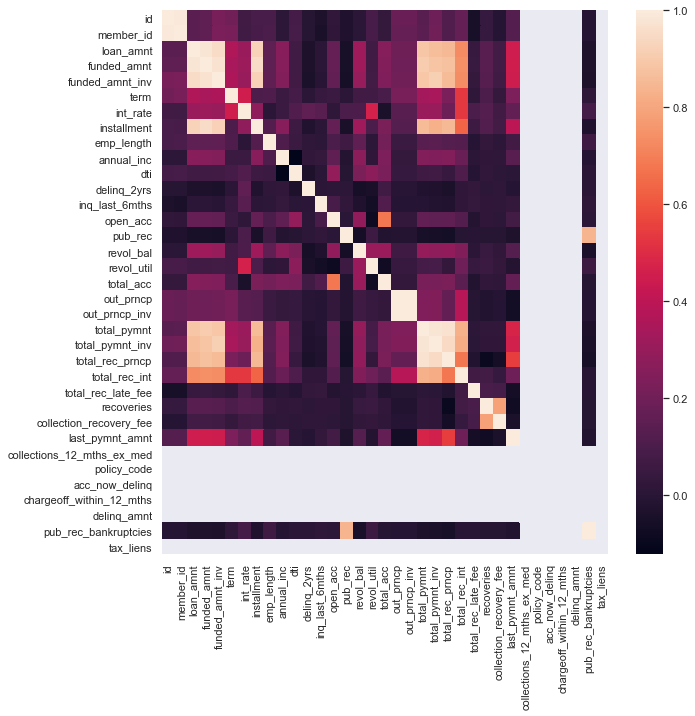

In [61]:
fig18 = plt.figure()
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr())
fig18.savefig('./plots/M_BA_Correlation.png', dpi = 100)
plt.show()

#### Inference:<br> loan_amnt, funded_amnt and funded_amnt_inv have very high correlation<br> Installment has high correlation with above mentioned variables.

### state-wise defaulter relation

<Figure size 1346.4x1027.44 with 0 Axes>

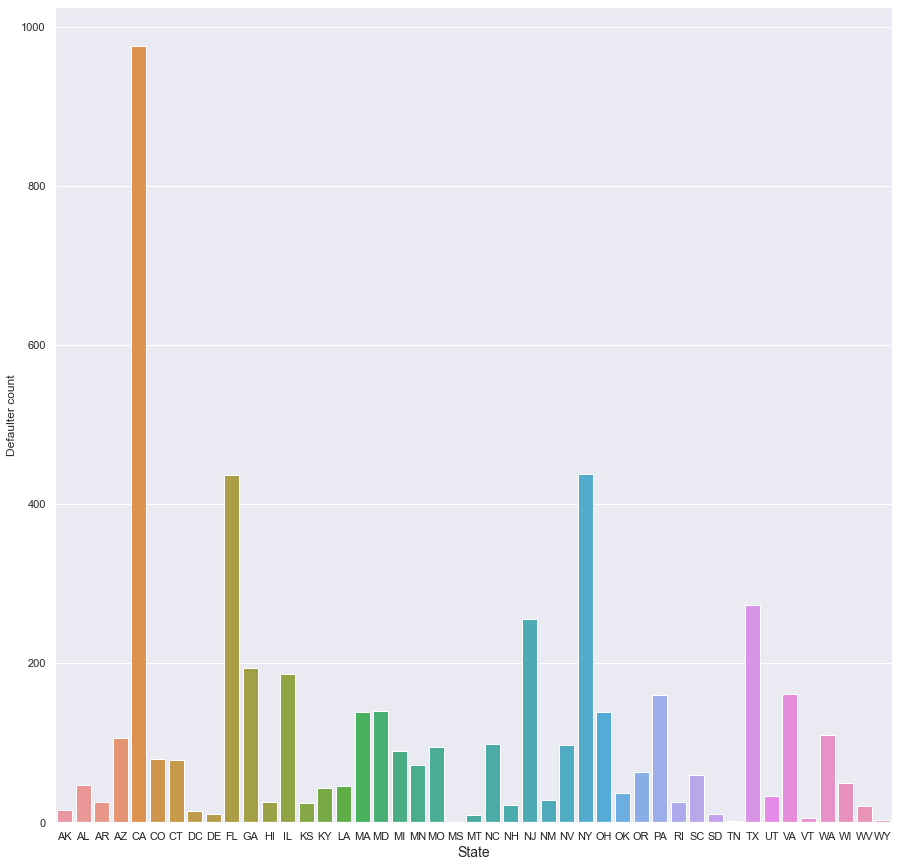

In [62]:
fig19 = plt.figure()
charge = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(y='loan_status', x='addr_state', data=charge)
plt.xlabel('State', fontsize = 14)
plt.ylabel('Defaulter count',fontsize = 12)
plt.show()
fig19.savefig('./plots/M_BA_statewisedefaulter.png')

#### Inference: State CA has maximum number of defaulters

### Relation Between Loan Status and Home ownership

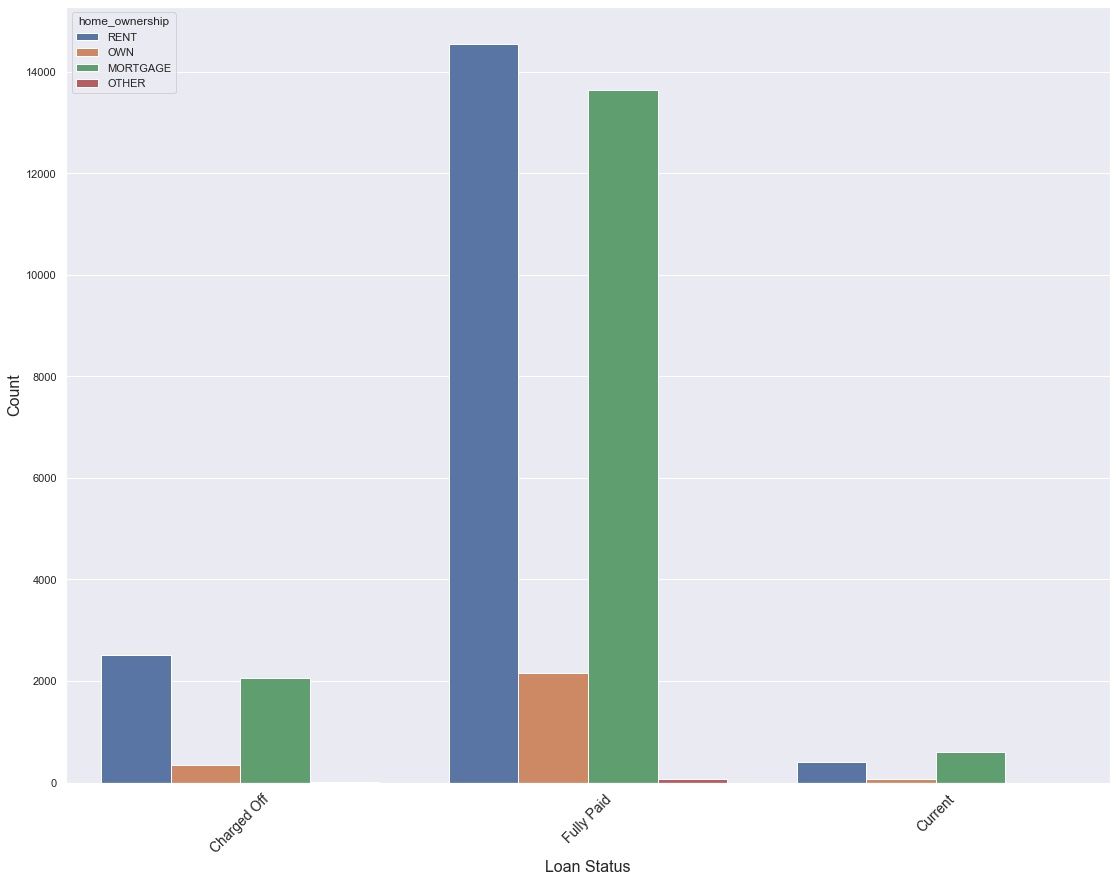

In [63]:
#Relation B/W loan_status and home_ownership
fig21 = plt.figure()
sns.countplot(x = loan_df.loan_status, hue = loan_df.home_ownership)
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel('Loan Status', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
fig21.savefig('./plots/M_BA_loanStatusVShomeOwnership.png')


#### Inference: <br>Defaulters are mostly the candidates with Rented or Mortgaged Apartments